In [1]:
import numpy as np
import panel as pn
import pandas as pd
import matplotlib
import bokeh
import holoviews as hv
from distutils.version import LooseVersion

In [2]:
min_versions = dict(pn='0.7.0', pd='0.24.0', matplotlib='2.1', bokeh='1.4.0', hv='1.12.3')

In [3]:
for lib, ver in min_versions.items():
    v = globals()[lib].__version__
    if LooseVersion(v) < LooseVersion(ver):
        print("Error: expected {}={}. got {}".format(lib, ver, v))

In [4]:
data = pd.read_csv('../data/datatest.txt')
data['date'] = data.date.astype('datetime64[ns]')
data = data.set_index('date')

data.tail()

Temperature  Humidity   Light      CO2  HumidityRatio  \
date                                                                         
2015-02-18 09:15:00       20.815   27.7175  429.75  1505.25       0.004213   
2015-02-18 09:16:00       20.865   27.7450  423.50  1514.50       0.004230   
2015-02-18 09:16:59       20.890   27.7450  423.50  1521.50       0.004237   
2015-02-18 09:17:59       20.890   28.0225  418.75  1632.00       0.004279   
2015-02-18 09:19:00       21.000   28.1000  409.00  1864.00       0.004321   

                     Occupancy  
date                            
2015-02-18 09:15:00          1  
2015-02-18 09:16:00          1  
2015-02-18 09:16:59          1  
2015-02-18 09:17:59          1  
2015-02-18 09:19:00          1

In [5]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas

%matplotlib inline

def mpl_plot(avg, highlight):
    fig = Figure()
    FigureCanvas(fig) # not needed in mpl >= 3.1
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='Temperature', window=30, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

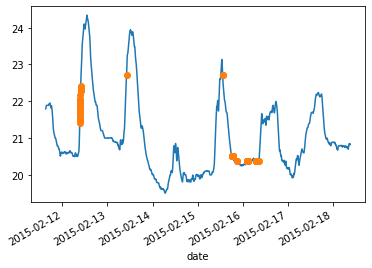

In [6]:
find_outliers(variable='Temperature', window=20, sigma=10)

Column
    [0] Column
        [0] Select(name='variable', options=['Temperature', ...], value='Temperature')
        [1] IntSlider(end=50, name='window', start=1, value=30)
        [2] IntSlider(end=50, name='sigma', start=1, value=10)
    [1] Row
        [0] Matplotlib(Figure, name='interactive01318')
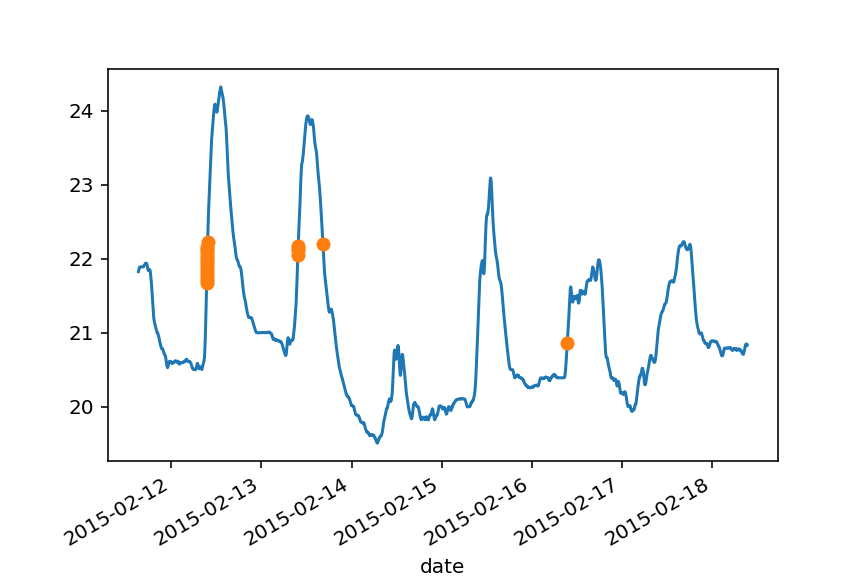

In [7]:
import panel as pn
pn.extension()

app = pn.interact(find_outliers, variable=['Temperature', 'CO2', 'Occupancy'], window=(1,50), sigma=(1,50))
app

In [8]:
app.servable();